<a href="https://colab.research.google.com/github/gabriel-masson/Chika_2025.1/blob/main/Correla%C3%A7%C3%A3o_Itensidade_da_dor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

#Dados

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/_MESTRADO/REPLICK/Base de Dados/V2_BANCO_DOTLAB_347.xlsx')
df.head()

,PID,D0_Diagnóstico CHIKV,D0_Método diagnóstico,D0_Data de início dos sintomas,D0_Data de recrutamento,D0_Fase CHIKF (D0),D0_DPIS ambulat-D0,D0_Dias após inicio de sintomas (DPIS)- recrut,D0_Novo critério (0-3/4-10),D0_Critério anterior (0/1-10),...,D0_intensdor_dedomaod,D0_intensdor_quadrile,D0_intensdor_quadrild,D0_intensdor_joelhoe,D0_intensdor_joelhod,D0_intensdor_tornozeloe,D0_intensdor_tornozelod,D0_intensdor_dedopee,D0_intensdor_dedoped,D0_categoria_ativdoenca
0,REC001,Positivo,TR,2019-08-01,2019-09-09,Subagudo,28,39,1,1,...,4,1,1,3,3,4,4,3,2,3
1,REC002,Positivo,TR,2019-09-01,2019-09-16,Subagudo,10,15,1,1,...,4,4,4,4,4,4,4,1,1,2
2,REC004,Positivo,RT-qPCR (ZDC),2020-07-04,2020-07-08,Agudo,4,4,1,1,...,4,1,1,1,1,1,1,1,1,4
3,REC005,Positivo,TR,2020-05-26,2020-07-08,Subagudo,43,43,1,1,...,3,2,2,2,2,4,4,3,3,4
4,REC006,Positivo,TR,2020-06-19,2020-07-13,Subagudo,24,24,1,1,...,2,1,1,1,1,2,2,3,2,3


In [ ]:
df['D0_homunculo_dor___f19']

,D0_homunculo_dor___f19
0,0
1,0
2,1
3,0
4,0
...,...
342,0
343,0
344,0
345,0


In [ ]:
df.shape

(347, 252)

In [ ]:
df1 = df[[
    "D0_intensdor_pesco_o",
    "D0_intensdor_costas",
    "D0_intensdor_ombroe",
    "D0_intensdor_ombrod",
    "D0_intensdor_cotoveloe",
    "D0_intensdor_cotovelod",
    "D0_intensdor_punhoe",
    "D0_intensdor_punhod",
    "D0_intensdor_dedomaoe",
    "D0_intensdor_dedomaod",
    "D0_intensdor_quadrile",
    "D0_intensdor_quadrild",
    "D0_intensdor_joelhoe",
    "D0_intensdor_joelhod",
    "D0_intensdor_tornozeloe",
    "D0_intensdor_tornozelod",
    "D0_intensdor_dedopee",
    "D0_intensdor_dedoped",
    'D0_Novo critério (0-3/4-10)'
]]
df1.head()

,D0_intensdor_pesco_o,D0_intensdor_costas,D0_intensdor_ombroe,D0_intensdor_ombrod,D0_intensdor_cotoveloe,D0_intensdor_cotovelod,D0_intensdor_punhoe,D0_intensdor_punhod,D0_intensdor_dedomaoe,D0_intensdor_dedomaod,D0_intensdor_quadrile,D0_intensdor_quadrild,D0_intensdor_joelhoe,D0_intensdor_joelhod,D0_intensdor_tornozeloe,D0_intensdor_tornozelod,D0_intensdor_dedopee,D0_intensdor_dedoped,D0_Novo critério (0-3/4-10)
0,2,1,1,1,3,2,3,3,4,4,1,1,3,3,4,4,3,2,1
1,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,1,1,1
2,1,1,1,1,1,1,4,4,4,4,1,1,1,1,1,1,1,1,1
3,3,3,4,3,4,3,4,4,4,3,2,2,2,2,4,4,3,3,1
4,2,2,1,1,1,1,2,2,2,2,1,1,1,1,2,2,3,2,1


In [ ]:
df1.columns

Index(['D0_intensdor_pesco_o', 'D0_intensdor_costas', 'D0_intensdor_ombroe',
       'D0_intensdor_ombrod', 'D0_intensdor_cotoveloe',
       'D0_intensdor_cotovelod', 'D0_intensdor_punhoe', 'D0_intensdor_punhod',
       'D0_intensdor_dedomaoe', 'D0_intensdor_dedomaod',
       'D0_intensdor_quadrile', 'D0_intensdor_quadrild',
       'D0_intensdor_joelhoe', 'D0_intensdor_joelhod',
       'D0_intensdor_tornozeloe', 'D0_intensdor_tornozelod',
       'D0_intensdor_dedopee', 'D0_intensdor_dedoped',
       'D0_Novo critério (0-3/4-10)'],
      dtype='object')

In [ ]:
# Remove o prefixo "D0_intensdor_" e mantém o restante do nome da coluna
df1.columns = df1.columns.str.replace(r'^D0_intensdor_', '', regex=True)
df1.rename(columns={'D0_Novo critério (0-3/4-10)': 'progression_disease'}, inplace=True)
df1.head()

<ipython-input-6-f3d75997e560>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'D0_Novo critério (0-3/4-10)': 'progression_disease'}, inplace=True)


,pesco_o,costas,ombroe,ombrod,cotoveloe,cotovelod,punhoe,punhod,dedomaoe,dedomaod,quadrile,quadrild,joelhoe,joelhod,tornozeloe,tornozelod,dedopee,dedoped,progression_disease
0,2,1,1,1,3,2,3,3,4,4,1,1,3,3,4,4,3,2,1
1,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,1,1,1
2,1,1,1,1,1,1,4,4,4,4,1,1,1,1,1,1,1,1,1
3,3,3,4,3,4,3,4,4,4,3,2,2,2,2,4,4,3,3,1
4,2,2,1,1,1,1,2,2,2,2,1,1,1,1,2,2,3,2,1


In [ ]:
# prompt: Quero as colunas com valores maior que 1 se tornem igual a 1 e os valores igual ou menor que 1 se tornem 0. Não mude nada da coluna progression_disease

# Select columns to transform, excluding 'progression_disease'
cols_to_transform = df1.columns.difference(['progression_disease'])

# Apply the transformation: values > 1 become 1, values <= 1 become 0
for col in cols_to_transform:
  df1.loc[df1[col] == 99, col] =  0

df1.head()

<ipython-input-7-6bfe9f1213c3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1[col] == 99, col] =  0


,pesco_o,costas,ombroe,ombrod,cotoveloe,cotovelod,punhoe,punhod,dedomaoe,dedomaod,quadrile,quadrild,joelhoe,joelhod,tornozeloe,tornozelod,dedopee,dedoped,progression_disease
0,2,1,1,1,3,2,3,3,4,4,1,1,3,3,4,4,3,2,1
1,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,1,1,1
2,1,1,1,1,1,1,4,4,4,4,1,1,1,1,1,1,1,1,1
3,3,3,4,3,4,3,4,4,4,3,2,2,2,2,4,4,3,3,1
4,2,2,1,1,1,1,2,2,2,2,1,1,1,1,2,2,3,2,1


In [ ]:
df1.columns

Index(['pesco_o', 'costas', 'ombroe', 'ombrod', 'cotoveloe', 'cotovelod',
       'punhoe', 'punhod', 'dedomaoe', 'dedomaod', 'quadrile', 'quadrild',
       'joelhoe', 'joelhod', 'tornozeloe', 'tornozelod', 'dedopee', 'dedoped',
       'progression_disease'],
      dtype='object')

In [ ]:
rename_dict = {
    'pesco_o': 'neck',
    'costas': 'back',
    'ombroe': 'shoulder_left',
    'ombrod': 'shoulder_right',
    'cotoveloe': 'elbow_left',
    'cotovelod': 'elbow_right',
    'punhoe': 'wrist_left',
    'punhod': 'wrist_right',
    'dedomaoe': 'hand_fingers_left',
    'dedomaod': 'hand_fingers_right',
    'quadrile': 'hip_left',
    'quadrild': 'hip_right',
    'joelhoe': 'knee_left',
    'joelhod': 'knee_right',
    'tornozeloe': 'ankle_left',
    'tornozelod': 'ankle_right',
    'dedopee': 'toe_left',
    'dedoped': 'toe_right',
    'progression_disease': 'progression_disease'  # permanece igual
}

# Renomeando as colunas
df1.rename(columns=rename_dict, inplace=True)

<ipython-input-8-3047f952066b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns=rename_dict, inplace=True)


In [ ]:
df1.columns

Index(['neck', 'back', 'shoulder_left', 'shoulder_right', 'elbow_left',
       'elbow_right', 'wrist_left', 'wrist_right', 'hand_fingers_left',
       'hand_fingers_right', 'hip_left', 'hip_right', 'knee_left',
       'knee_right', 'ankle_left', 'ankle_right', 'toe_left', 'toe_right',
       'progression_disease'],
      dtype='object')

In [ ]:
df_tot, _ = df.shape
df_tot

347

####X²

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

def analyze_contingency(df, col1, col2):
    """
    Performs a chi-squared contingency test and computes Odds Ratios.
    For variables with more than 2 categories, OR is computed relative to the first level.

    Args:
        df: The input DataFrame.
        col1: The name of the feature column.
        col2: The name of the target column (e.g., progression).
    """
    tabela_contingencia = pd.crosstab(df[col1], df[col2])
    print('-' * 40)

    # Teste Qui-Quadrado
    chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

    # print("Frequências esperadas:\n", pd.DataFrame(expected,
    #       index=tabela_contingencia.index,
    #       columns=tabela_contingencia.columns).astype(int))
    print('-*' * 20)
    print(f"Coluna: {col1}")
    print(f"Qui-Quadrado: {chi2:.4f}")
    print(f"Valor-p: {p}")
    print(f"Graus de liberdade: {dof}")

    # # Interpretação da hipótese nula
    # alpha = 0.05
    # if p < alpha:
    #     print("Resultado: Rejeita-se a hipótese nula. Existe associação entre as variáveis.")
    # else:
    #     print("Resultado: Não se rejeita a hipótese nula. Não há evidência de associação.")

    # print("\nOdds Ratios em relação à categoria de referência (nível 0):")

    # # Verifica se tem pelo menos duas colunas (classes 0 e 1)
    # if tabela_contingencia.shape[1] == 2 and 0 in tabela_contingencia.index:
    #     ref_row = tabela_contingencia.loc[0]
    #     ref_0, ref_1 = ref_row[0], ref_row[1]

    #     for idx in tabela_contingencia.index:
    #         if idx == 0:
    #             continue  # pula a referência

    #         val_0, val_1 = tabela_contingencia.loc[idx][0], tabela_contingencia.loc[idx][1]

    #         # OR = (val_1 / val_0) / (ref_1 / ref_0)
    #         if val_0 == 0 or ref_0 == 0:
    #             print(f"Nível {idx}: Odds Ratio indefinido (divisão por zero).")
    #         else:
    #             or_categoria = (val_1 / val_0) / (ref_1 / ref_0)
    #             print(f"Nível {idx} vs 0: OR = {or_categoria:.4f}")
    # else:
    #     print("Odds Ratio: Não aplicável (tabela não tem duas colunas ou nível 0 ausente).")

    print('-*' * 20)


In [ ]:
dores = df1.columns[:-1]

for i in dores:
  analyze_contingency(df1, i, 'progression_disease')


----------------------------------------
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Coluna: neck
Qui-Quadrado: 11.7923
Valor-p: 0.018964791019437936
Graus de liberdade: 4
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
----------------------------------------
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Coluna: back
Qui-Quadrado: 16.9219
Valor-p: 0.002001626144601775
Graus de liberdade: 4
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
----------------------------------------
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Coluna: shoulder_left
Qui-Quadrado: 11.6957
Valor-p: 0.019763436870836353
Graus de liberdade: 4
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
----------------------------------------
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Coluna: shoulder_right
Qui-Quadrado: 16.5208
Valor-p: 0.0023943134738632407
Graus de liberdade: 4
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
----------------------------------------
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Coluna: elbow_left
Qui-Quadrado: 12.2307
Valor-p: 0.015715

In [ ]:
df1.drop(columns=['neck', 'back',  'elbow_left', 'elbow_right', 'hip_left', 'hip_right'], inplace=True)

<ipython-input-9-2612c2f417af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['neck', 'back',  'elbow_left', 'elbow_right', 'hip_left', 'hip_right'], inplace=True)


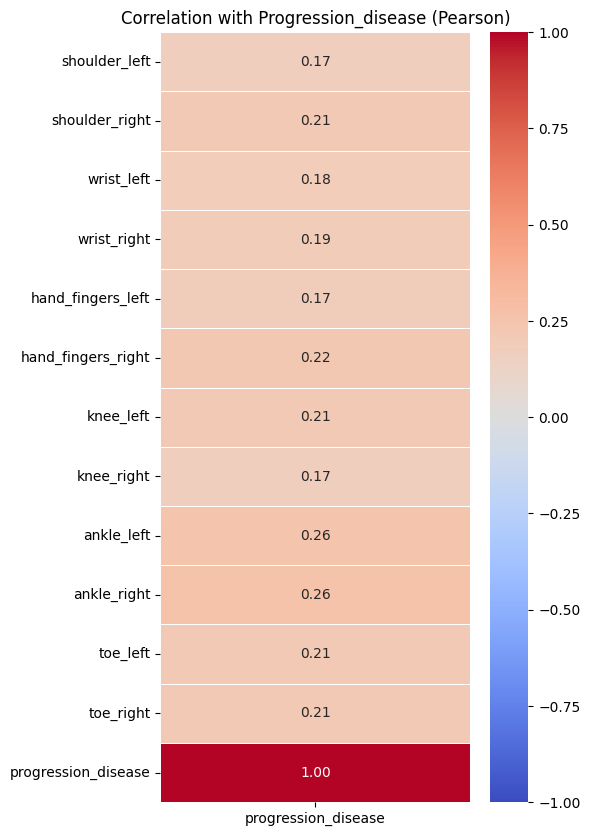

In [ ]:
# Calculando a matriz de correlação
metodo = 'pearson'
matriz_correlacao = df1.corr(method=metodo)

# Filtrando apenas a coluna 'Progression_disease'
correlacao_progressao = matriz_correlacao[['progression_disease']]

# Gerar gráfico de calor
plt.figure(figsize=(5, 10))
sns.heatmap(correlacao_progressao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title(f'Correlation with Progression_disease ({metodo.capitalize()})')
plt.show()

#Analise com os dados do replick

In [ ]:
# 4307513 cases of Dengue and 325000 cases of Chikungunya
# 5724

In [ ]:
df_replick = pd.read_excel('/content/drive/MyDrive/_MESTRADO/REPLICK/Base de Dados/AWS_base.xlsx')
df_replick.shape

(347, 241)

In [ ]:
df_replick.head()

,D0_Método diagnóstico,D0_Fase CHIKF (D0),D0_Dias após inicio de sintomas (DPIS)- recrut,D0_DPIS ambulat-D0,D0_Novo critério (0-3/4-10),D0_idade,D0_genero,D0_cor,D0_ocupacao,D0_escolaridade,...,D0_intensdor_dedomaod,D0_intensdor_quadrile,D0_intensdor_quadrild,D0_intensdor_joelhoe,D0_intensdor_joelhod,D0_intensdor_tornozeloe,D0_intensdor_tornozelod,D0_intensdor_dedopee,D0_intensdor_dedoped,D0_categoria_ativdoenca
0,0,0,39,28,1,34,2,3,0,7,...,4,1,1,3,3,4,4,3,2,3
1,0,0,15,10,1,67,2,1,1,2,...,4,4,4,4,4,4,4,1,1,2
2,1,1,4,4,1,48,2,1,2,5,...,4,1,1,1,1,1,1,1,1,4
3,0,0,43,43,1,47,2,1,3,5,...,3,2,2,2,2,4,4,3,3,4
4,0,0,24,24,1,23,2,3,4,7,...,2,1,1,1,1,2,2,3,2,3


In [ ]:
fs_high = ['D0_artralgia_episodio1', 'D0_Novo critério (0-3/4-10)']
fs_mid = ['D0_mialgia_episodio1','D0_lesoes_episodio1']
fs_low = ['D0_febre_episodio1',       'D0_cefaleia_episodio1',   'D0_fadiga_episodio1',
     'D0_palidez_episodio1',     'D0_hiperemia_episodio1',  'D0_turvacao_episodio1',
     'D0_nausea_episodio1',      'D0_vomito_episodio1',     'D0_diarreia_episodio1',
     'D0_parestesia_episodio1',  'D0_disestesia_episodio1', 'D0_edema_episodio1',
     'D0_lombalgia_episodio1',   'D0_prurido_episodio1',    'D0_rash_episodio1',
     'D0_alopecia_episodio1',    'D0_alteracaomemoria_episodio1',   'D0_alteracaolibido_episodio1',
     'D0_enpp_fadiga', ]

fs_dores = [
              'D0_intensdor_pesco_o', 'D0_intensdor_costas', 'D0_intensdor_ombroe', 'D0_intensdor_ombrod', 'D0_intensdor_cotoveloe', 'D0_intensdor_cotovelod',
       'D0_intensdor_punhoe', 'D0_intensdor_punhod', 'D0_intensdor_dedomaoe', 'D0_intensdor_dedomaod', 'D0_intensdor_quadrile', 'D0_intensdor_quadrild',
       'D0_intensdor_joelhoe', 'D0_intensdor_joelhod', 'D0_intensdor_tornozeloe', 'D0_intensdor_tornozelod', 'D0_intensdor_dedopee', 'D0_intensdor_dedoped']

df_replick = df_replick[fs_high + fs_mid + fs_low + fs_dores]
# Removendo os prefixos "D0_" e "_episodio1"
df_replick.columns = df_replick.columns.str.replace(r'^D0_', '', regex=True).str.replace(r'_episodio1$', '', regex=True)
df_replick.columns = df_replick.columns.str.replace(r'^intensdor_', '', regex=True)
df_replick.rename(columns={'Novo critério (0-3/4-10)': 'Progression_disease'}, inplace=True)


<ipython-input-56-b413e88e43a3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_replick.rename(columns={'Novo critério (0-3/4-10)': 'Progression_disease'}, inplace=True)


In [ ]:
df_replick['Progression_disease'].value_counts()

,count
Progression_disease,
1,247
0,100


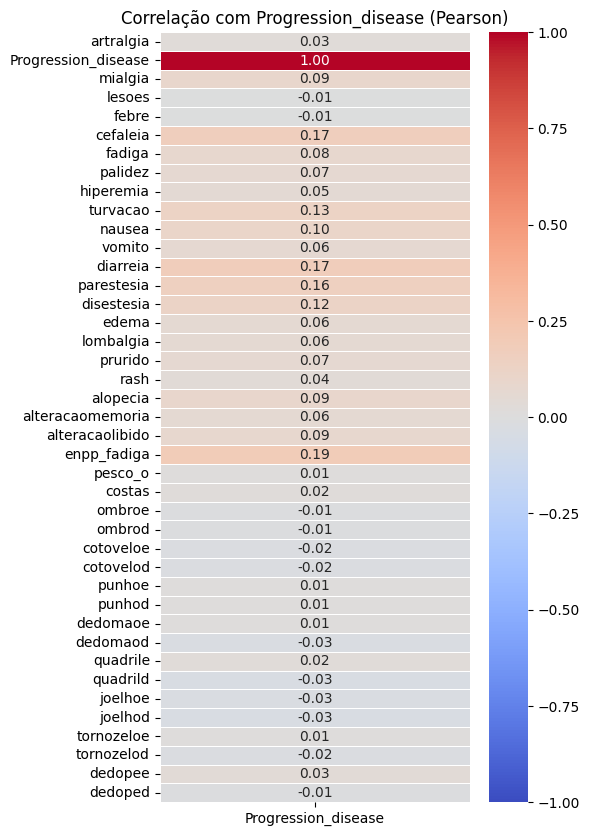

In [ ]:
# Calculando a matriz de correlação
metodo = 'pearson'
matriz_correlacao = df_replick.corr(method=metodo)

# Filtrando apenas a coluna 'Progression_disease'
correlacao_progressao = matriz_correlacao[['Progression_disease']]

# Gerar gráfico de calor
plt.figure(figsize=(5, 10))  # Ajuste de tamanho para melhor visualização
sns.heatmap(correlacao_progressao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title(f'Correlation with Progression_disease ({metodo.capitalize()})')
plt.show()


In [ ]:
df_replick.loc[df_replick['Progression_disease'] == 0, 'Progression_disease'] = "Sem progressao"
df_replick.loc[df_replick['Progression_disease'] == 1, 'Progression_disease'] = "Cronificacao"

<ipython-input-25-0d68f51d97a2>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem progressao' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_replick.loc[df_replick['Progression_disease'] == 0, 'Progression_disease'] = "Sem progressao"


In [ ]:
df_replick.head()

,artralgia,Progression_disease,mialgia,lesoes,febre,cefaleia,fadiga,palidez,hiperemia,turvacao,...,intensdor_punhoe,intensdor_punhod,intensdor_dedomaoe,intensdor_dedomaod,intensdor_joelhoe,intensdor_joelhod,intensdor_tornozeloe,intensdor_tornozelod,intensdor_dedopee,intensdor_dedoped
0,1,Cronificacao,1,0,1,0,1,0,0,0,...,3,3,4,4,3,3,4,4,3,2
1,1,Cronificacao,0,0,1,0,0,0,0,0,...,3,3,4,4,4,4,4,4,1,1
2,1,Cronificacao,0,1,1,0,1,0,1,0,...,4,4,4,4,1,1,1,1,1,1
3,1,Cronificacao,0,0,1,1,1,0,0,0,...,4,4,4,3,2,2,4,4,3,3
4,1,Cronificacao,0,0,1,0,1,0,0,0,...,2,2,2,2,1,1,2,2,3,2


In [ ]:
df_replick.columns

Index(['artralgia', 'Progression_disease', 'mialgia', 'lesoes', 'febre',
       'cefaleia', 'fadiga', 'palidez', 'hiperemia', 'turvacao', 'nausea',
       'vomito', 'diarreia', 'parestesia', 'disestesia', 'edema', 'lombalgia',
       'prurido', 'rash', 'alopecia', 'alteracaomemoria', 'alteracaolibido',
       'enpp_fadiga', 'intensdor_ombroe', 'intensdor_ombrod',
       'intensdor_punhoe', 'intensdor_punhod', 'intensdor_dedomaoe',
       'intensdor_dedomaod', 'intensdor_joelhoe', 'intensdor_joelhod',
       'intensdor_tornozeloe', 'intensdor_tornozelod', 'intensdor_dedopee',
       'intensdor_dedoped'],
      dtype='object')

In [ ]:
df_replick['artralgia'].value_counts()

,count
artralgia,
1,339
0,8


In [ ]:
def analyze_contingency(df, col1, col2):
  """
  Performs a chi-squared contingency test for two columns in a DataFrame.

  Args:
    df: The input DataFrame.
    col1: The name of the first column.
    col2: Target column.
  """
  df.loc[df[col1] == 0, col1] = "Sem " + col1
  df.loc[df[col1] == 1, col1] = "Com " + col1
  tabela_contingencia = pd.crosstab(df[col1], df[col2])
  print(tabela_contingencia)

  chi2, p, dof, expected = chi2_contingency(tabela_contingencia)
  print('-'*40)
  print("Frequências esperadas:\n")
  data = pd.DataFrame(expected)

  data = data.rename(columns={0: "Cronificação", 1: "Sem Cronificação", 2: "OUTRAS DOENÇAS"})
  data = data.rename(index={1:  f'Com {col1}',0: f'Sem {col1}'})
  data = data.astype(int)

  print(data)
  print('-*'*20)
  print(f"Coluna: {col1}")
  print(f"Qui-Quadrado: {chi2}")
  print(f"Valor-p: {p}")
  print(f"Graus de liberdade: {dof}")
  print("\n")

  # print(expected)
  print('-*'*20)


In [ ]:
df_replick['mialgia'].value_counts()

,count
mialgia,
0,227
1,120


In [ ]:
sintomas = ['artralgia', 'mialgia', 'lesoes', 'febre','cefaleia', 'fadiga', 'palidez', 'hiperemia', 'turvacao',
            'nausea', 'vomito', 'diarreia', 'parestesia', 'disestesia', 'edema', 'lombalgia', 'prurido', 'rash']

for i in sintomas:
  analyze_contingency(df_replick, i, "Progression_disease")

<ipython-input-29-718d6082a9a6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem artralgia' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col1] == 0, col1] = "Sem " + col1
<ipython-input-29-718d6082a9a6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem mialgia' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col1] == 0, col1] = "Sem " + col1
<ipython-input-29-718d6082a9a6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem lesoes' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col1] == 0, col1] = "Sem " + col1
<ipython-input-29-718d6082a9a6>:10: FutureWarning: Setting an item

Progression_disease  Cronificacao  Sem progressao
artralgia                                        
Com artralgia                 242              97
Sem artralgia                   5               3
----------------------------------------
Frequências esperadas:

               Cronificação  Sem Cronificação
Sem artralgia           241                97
Com artralgia             5                 2
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Coluna: artralgia
Qui-Quadrado: 0.02360208564723585
Valor-p: 0.8779017153478383
Graus de liberdade: 1


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Progression_disease  Cronificacao  Sem progressao
mialgia                                          
Com mialgia                    92              28
Sem mialgia                   155              72
----------------------------------------
Frequências esperadas:

             Cronificação  Sem Cronificação
Sem mialgia            85                34
Com mialgia           161                65
-*-*-*-*-*-*-*

<ipython-input-29-718d6082a9a6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem edema' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col1] == 0, col1] = "Sem " + col1
<ipython-input-29-718d6082a9a6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem lombalgia' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col1] == 0, col1] = "Sem " + col1
<ipython-input-29-718d6082a9a6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem prurido' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col1] == 0, col1] = "Sem " + col1
<ipython-input-29-718d6082a9a6>:10: FutureWarning: Setting an item 